<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_EGLMS_Project/blob/main/%5BExp_9%5DFind_Person_Mode_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Exp_9]Find Person Mode Problems

## 1. import 및 모델 가져오기

In [139]:
# !pip install numpy==1.21

In [140]:
# !pip install tensorflow-gpu==2.4.0 keras==2.4.0

In [141]:
# !pip install pixellib

In [142]:
# !pip install Pillow==8.3.2

### 1) import

In [143]:
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

### 2) model

In [144]:
# 저장할 파일 이름을 결정합니다
model_dir = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/models/"
model_file = model_dir + "deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f1587680790>)

In [145]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

## 2. 3가지 인물사진 확인

### 1. 사람 이미지

#### 1) 이미지 가져오기

(786, 1008, 3)


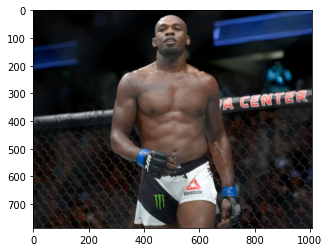

In [146]:
people_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/존존스.png" 
people_img_orig = cv2.imread(people_img_path) 

print(people_img_orig.shape)
plt.imshow(cv2.cvtColor(people_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 2) 모델에 이미지 적용

In [147]:
people_segvalues, people_output = model.segmentAsPascalvoc(people_img_path)

#### 3) 이미지 정보 확인

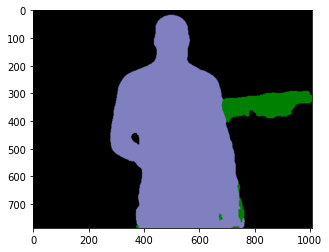

In [148]:
plt.imshow(people_output)
plt.show()

In [149]:
people_segvalues

{'class_ids': array([ 0,  2, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [150]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for people_class_id in people_segvalues['class_ids']:
    print(LABEL_NAMES[people_class_id])

background
bicycle
person


In [151]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [152]:
colormap[15]

array([192, 128, 128])

#### 4) 세그먼테이션

In [153]:
people_seg_color = (128,128,192)

(786, 1008)


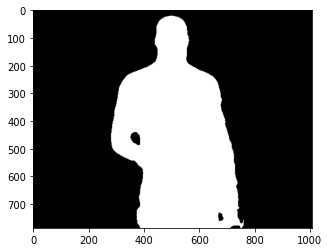

In [154]:
people_seg_map = np.all(people_output==people_seg_color, axis=-1)
print(people_seg_map.shape)
plt.imshow(people_seg_map, cmap='gray')
plt.show()

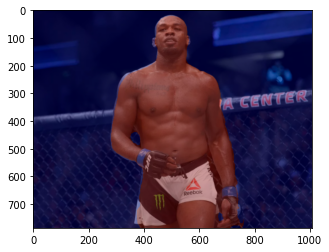

In [155]:
people_img_show = people_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
people_img_mask = people_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
people_color_mask = cv2.applyColorMap(people_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
people_img_show = cv2.addWeighted(people_img_show, 0.6, people_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(people_img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5) 배경흐리게 하기

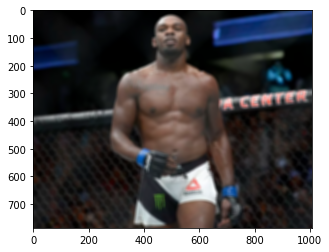

In [156]:
people_img_orig_blur = cv2.blur(people_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(people_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

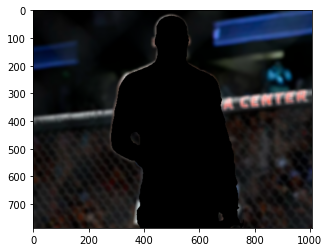

In [157]:
people_img_mask_color = cv2.cvtColor(people_img_mask, cv2.COLOR_GRAY2BGR)
people_img_bg_mask = cv2.bitwise_not(people_img_mask_color)
people_img_bg_blur = cv2.bitwise_and(people_img_orig_blur, people_img_bg_mask)
plt.imshow(cv2.cvtColor(people_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 6) 흐린 배경과 원본 영상 합성

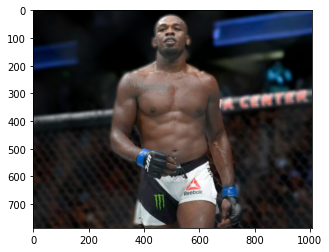

In [158]:
people_img_concat = np.where(people_img_mask_color==255, people_img_orig, people_img_bg_blur)
plt.imshow(cv2.cvtColor(people_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 동물 이미지

#### 1) 이미지 가져오기

(654, 984, 3)


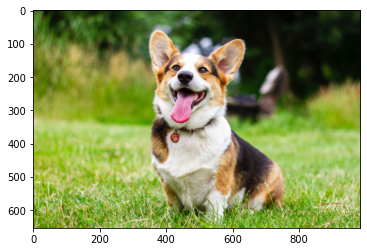

In [159]:
animal_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/강아지.png" 
animal_img_orig = cv2.imread(animal_img_path) 

print(animal_img_orig.shape)
plt.imshow(cv2.cvtColor(animal_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 2) 모델에 이미지 적용

In [160]:
animal_segvalues, animal_output = model.segmentAsPascalvoc(animal_img_path)

#### 3) 이미지 정보 확인

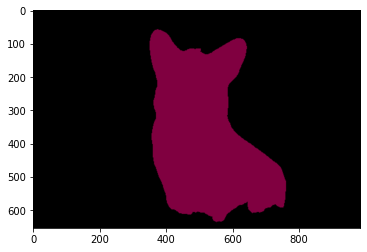

In [161]:
plt.imshow(animal_output)
plt.show()

In [162]:
animal_segvalues

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [163]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for animal_class_id in animal_segvalues['class_ids']:
    print(LABEL_NAMES[animal_class_id])

background
dog


In [164]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [165]:
colormap[12]

array([ 64,   0, 128])

#### 4) 세그먼테이션

In [166]:
animal_seg_color = (128, 0, 64)

(654, 984)


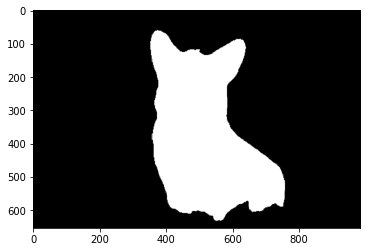

In [167]:
animal_seg_map = np.all(animal_output==animal_seg_color, axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

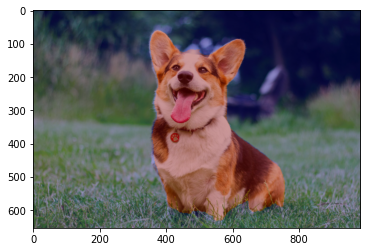

In [168]:
animal_img_show = animal_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
animal_img_mask = animal_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
animal_color_mask = cv2.applyColorMap(animal_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
animal_img_show = cv2.addWeighted(animal_img_show, 0.6, animal_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(animal_img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5) 배경흐리게 하기

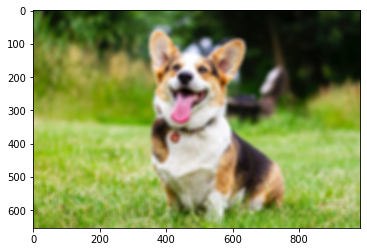

In [169]:
animal_img_orig_blur = cv2.blur(animal_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(animal_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

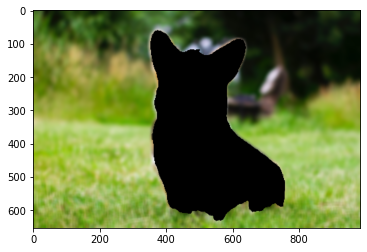

In [170]:
animal_img_mask_color = cv2.cvtColor(animal_img_mask, cv2.COLOR_GRAY2BGR)
animal_img_bg_mask = cv2.bitwise_not(animal_img_mask_color)
animal_img_bg_blur = cv2.bitwise_and(animal_img_orig_blur, animal_img_bg_mask)
plt.imshow(cv2.cvtColor(animal_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 6) 흐린 배경과 원본 영상 합성

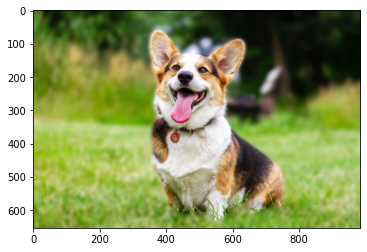

In [171]:
animal_img_concat = np.where(animal_img_mask_color==255, animal_img_orig, animal_img_bg_blur)
plt.imshow(cv2.cvtColor(animal_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 3. 배경 이미지 바꾸기

#### 1) 이미지 가져오기

(500, 800, 3)


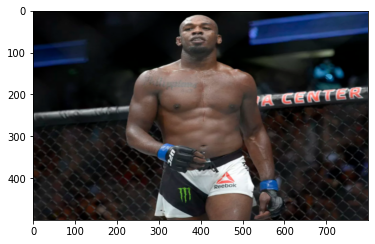

In [172]:
people_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/존존스.png" 
people_img_orig = cv2.imread(people_img_path) 
people_img_orig = cv2.resize(people_img_orig, (800, 500))
print(people_img_orig.shape)
plt.imshow(cv2.cvtColor(people_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(500, 800, 3)


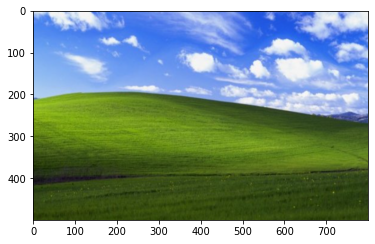

In [173]:
bg_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/배경.png" 
bg_img_orig = cv2.imread(bg_img_path) 
bg_img_orig = cv2.resize(bg_img_orig, (800, 500))
print(bg_img_orig.shape)
plt.imshow(cv2.cvtColor(bg_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 2) 모델에 이미지 적용

In [174]:
people_segvalues, people_output = model.segmentAsPascalvoc(people_img_path)

In [175]:
people_output = cv2.resize(people_output, (800, 500))

#### 3) 이미지 정보 확인

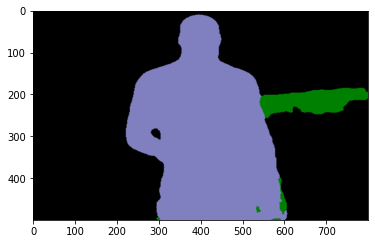

In [176]:
plt.imshow(people_output)
plt.show()

In [177]:
people_segvalues

{'class_ids': array([ 0,  2, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [178]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for people_class_id in people_segvalues['class_ids']:
    print(LABEL_NAMES[people_class_id])

background
bicycle
person


In [179]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [180]:
colormap[15]

array([192, 128, 128])

#### 4) 세그먼테이션

In [181]:
people_seg_color = (128,128,192)

(500, 800)


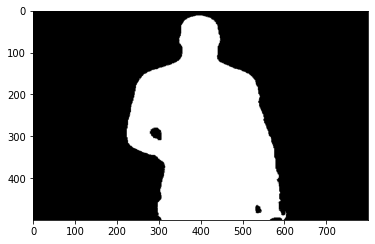

In [182]:
people_seg_map = np.all(people_output==people_seg_color, axis=-1)
print(people_seg_map.shape)
plt.imshow(people_seg_map, cmap='gray')
plt.show()

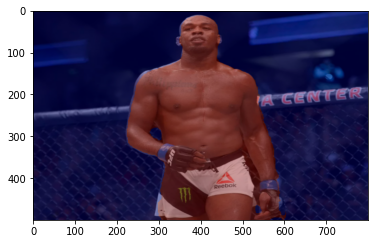

In [183]:
people_img_show = people_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
people_img_mask = people_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
people_color_mask = cv2.applyColorMap(people_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
people_img_show = cv2.addWeighted(people_img_show, 0.6, people_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(people_img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5) 배경흐리게 하기

In [184]:
people_img_mask_color = cv2.cvtColor(people_img_mask, cv2.COLOR_GRAY2BGR)
people_img_bg_mask = cv2.bitwise_not(people_img_mask_color)

#### 6) 흐린 배경과 원본 영상 합성

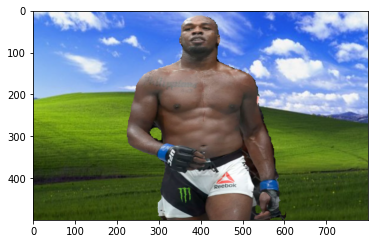

In [185]:
people_img_concat = np.where(people_img_mask_color==255, people_img_orig, bg_img_orig)
plt.imshow(cv2.cvtColor(people_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 3. 실패한 시도

### 1. 호랑이 이미지(장애물 많은)

#### 1) 이미지 가져오기

(448, 717, 3)


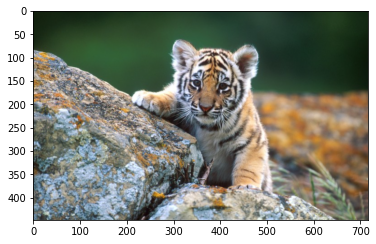

In [186]:
animal_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/호냥이.png" 
animal_img_orig = cv2.imread(animal_img_path) 

print(animal_img_orig.shape)
plt.imshow(cv2.cvtColor(animal_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 2) 모델에 이미지 적용

In [187]:
animal_segvalues, animal_output = model.segmentAsPascalvoc(animal_img_path)

#### 3) 이미지 정보 확인

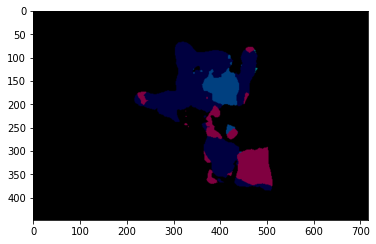

In [188]:
plt.imshow(animal_output)
plt.show()

In [189]:
animal_segvalues

{'class_ids': array([ 0,  3,  8, 12, 17]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [190]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for animal_class_id in animal_segvalues['class_ids']:
    print(LABEL_NAMES[animal_class_id])

background
bird
cat
dog
sheep


In [191]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [192]:
print(colormap[0])
print(colormap[3])
print(colormap[8])
print(colormap[12])
print(colormap[17])

[0 0 0]
[128 128   0]
[64  0  0]
[ 64   0 128]
[128  64   0]


#### 4) 세그먼테이션

In [193]:
animal_seg_color = (0,0 ,0) # 배경
animal_seg_color2 = (0,128,128) # 새
animal_seg_color3 = (0,0 ,64) # 고양이
animal_seg_color4 = (128,0 ,64) # 강아지
animal_seg_color5 = (0,64 ,128) # 양

##### (1) 배경으로 인식한 호랑이

(448, 717)


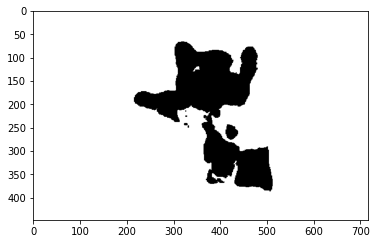

In [194]:
animal_seg_map = np.all(animal_output==(animal_seg_color ), axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

##### (2) 배경의 반대것을 추출한 호랑이(호랑이를 배경으로 인식하기 때문)

(448, 717)


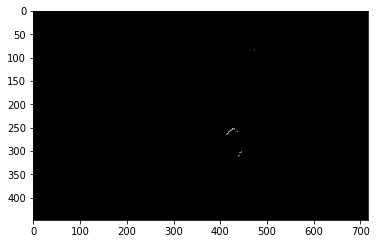

In [195]:
animal_seg_map = np.all(animal_output!=(animal_seg_color ), axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

##### (3) 고양이로 인식

(448, 717)


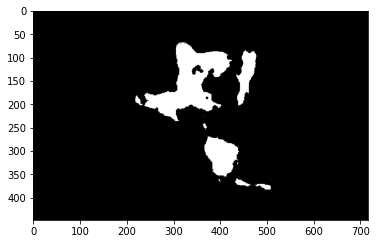

In [196]:
animal_seg_map = np.all(animal_output==(animal_seg_color3 ), axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

##### (4) 고양이 + 배경

(448, 717)


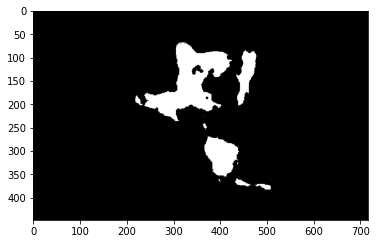

In [197]:
animal_seg_map = np.all(animal_output==(animal_seg_color3 or animal_seg_color2 or animal_seg_color4 or animal_seg_color5  ), axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

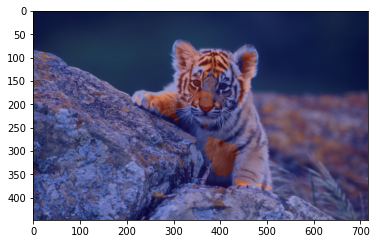

In [198]:
animal_img_show = animal_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
animal_img_mask = animal_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
animal_color_mask = cv2.applyColorMap(animal_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
animal_img_show = cv2.addWeighted(animal_img_show, 0.6, animal_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(animal_img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5) 배경흐리게 하기

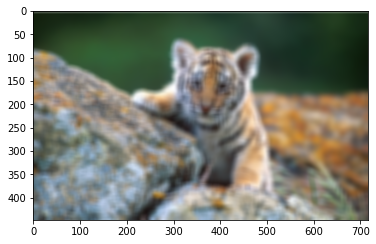

In [199]:
animal_img_orig_blur = cv2.blur(animal_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(animal_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

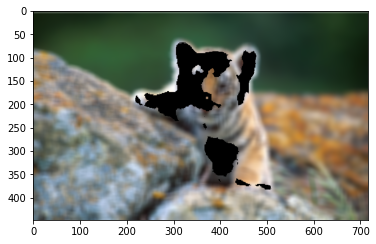

In [200]:
animal_img_mask_color = cv2.cvtColor(animal_img_mask, cv2.COLOR_GRAY2BGR)
animal_img_bg_mask = cv2.bitwise_not(animal_img_mask_color)
animal_img_bg_blur = cv2.bitwise_and(animal_img_orig_blur, animal_img_bg_mask)
plt.imshow(cv2.cvtColor(animal_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 6) 흐린 배경과 원본 영상 합성

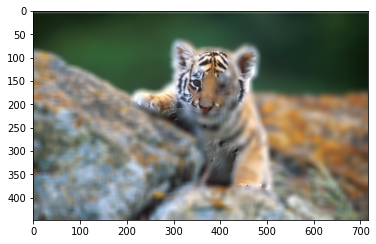

In [201]:
animal_img_concat = np.where(animal_img_mask_color==255, animal_img_orig, animal_img_bg_blur)
plt.imshow(cv2.cvtColor(animal_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2. 호랑이 이미지(장애물 없는)

#### 1) 이미지 가져오기

(412, 592, 3)


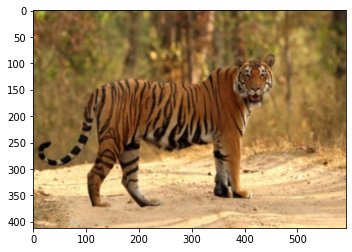

In [202]:
animal_img_path = "/content/drive/MyDrive/인공지능/아이펠/ES/data/human_segmentation/images/호냥이2.png" 
animal_img_orig = cv2.imread(animal_img_path) 

print(animal_img_orig.shape)
plt.imshow(cv2.cvtColor(animal_img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 2) 모델에 이미지 적용

In [203]:
animal_segvalues, animal_output = model.segmentAsPascalvoc(animal_img_path)

#### 3) 이미지 정보 확인

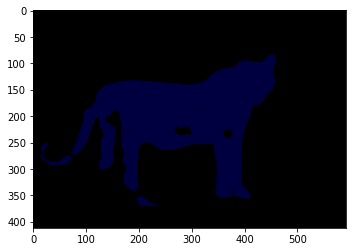

In [204]:
plt.imshow(animal_output)
plt.show()

In [205]:
animal_segvalues

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [206]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

for animal_class_id in animal_segvalues['class_ids']:
    print(LABEL_NAMES[animal_class_id])

background
cat


In [207]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [208]:
print(colormap[8])

[64  0  0]


#### 4) 세그먼테이션

In [209]:
animal_seg_color3 = (0,0 ,64) # 고양이

##### (3) 고양이로 인식

(412, 592)


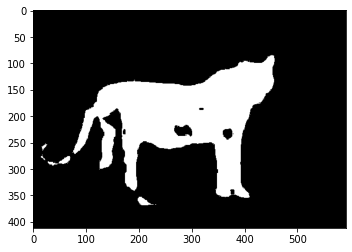

In [210]:
animal_seg_map = np.all(animal_output==(animal_seg_color3 ), axis=-1)
print(animal_seg_map.shape)
plt.imshow(animal_seg_map, cmap='gray')
plt.show()

##### (4) 고양이 + 배경

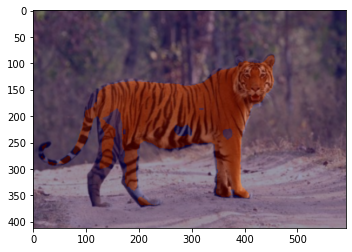

In [211]:
animal_img_show = animal_img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
animal_img_mask = animal_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
animal_color_mask = cv2.applyColorMap(animal_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
animal_img_show = cv2.addWeighted(animal_img_show, 0.6, animal_color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(animal_img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 5) 배경흐리게 하기

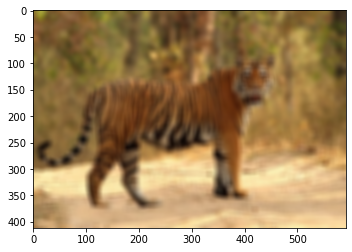

In [212]:
animal_img_orig_blur = cv2.blur(animal_img_orig, (13,13))  
plt.imshow(cv2.cvtColor(animal_img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

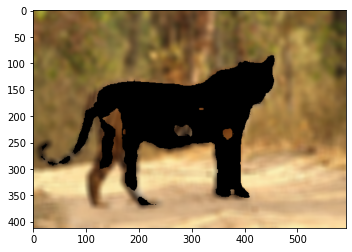

In [213]:
animal_img_mask_color = cv2.cvtColor(animal_img_mask, cv2.COLOR_GRAY2BGR)
animal_img_bg_mask = cv2.bitwise_not(animal_img_mask_color)
animal_img_bg_blur = cv2.bitwise_and(animal_img_orig_blur, animal_img_bg_mask)
plt.imshow(cv2.cvtColor(animal_img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### 6) 흐린 배경과 원본 영상 합성

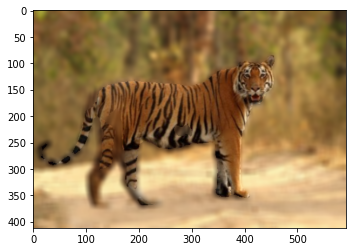

In [214]:
animal_img_concat = np.where(animal_img_mask_color==255, animal_img_orig, animal_img_bg_blur)
plt.imshow(cv2.cvtColor(animal_img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 4. 문제점 분석 및 개선책 제안
### 1. 인물사진에 나타나는 문제점
> - 모델내에 호랑이를 인식을 학습시킨 정보가 없어 호랑이를 인식하지 못한다.
> - 그래도 호랑이도 고양이과 이기 때문에 고양이로 하면 되지 않을까 생각되어 고양이로 진행하였다.
> - 그나마 희망이 있는건 고양이로 인식했을때 그나마 가장 많은 부분이 인식되고 있었다.
> - 나머지 인식하지 못하는 부분도 추가하기 위해서 배경+고양이, 배경 반대것등을 해보았으나 소용이 없었다.
> - 여기서 문득 든 생각이 주변 장애물이 많아서 제대로 출력하고 있지 않은가 싶어서 장애물이 없는 호랑이 사진을 가져왔다. (여기에 대한 설명은 밑에 3.에 적혀있다.) 

### 2. 호랑이 사진 문제가 아닐 수 있어 다른 호랑이 사진을 가져옴
> - 돌과 같은 장애물이 많이 없는 호랑이 사진을 가지고 왔다.
> - 첫번째 호랑이 사진에 비해서 많은 부분을 인식하고 있다 단, 호랑이가 아니라 고양이로 인식하고있다.
> - 역시 호랑이는 고양이과이다. 이 모델로 무슨 종류의 과인지는 확인할 수 있을 듯 하다
> - 하지만 여전히 5%정도 짤려서 인식하고 있는 것을 확인할 수 있다. 호랑이를 고양이로 인식하는 한계로 생각해볼 수 있다.

### 3. 사진 솔루션 개선 방법
> - 호랑이를 같은 과인 고양이로 인식해서 최대한 오류를 줄이는 것이 첫번째 방법읻다. 그러니 이것은 궁극적인 해결방법이 되지는 못할 것이다.
> - 궁극적인 개선을 위해서는 사용모델 자체를 호랑이 이미지를 학습된 모델로 업그레드해야할 것으로 보인다. 그래야 100% 호랑이를 인식할 수 있을 것으로 생각된다.

## 5.회고
- 루브릭 조건을 맞추기 위해서 시도한 것
  - 문제점을 분석하기 위해서 쉬운 이미지 보다 어려운 이미지를 가져와서 출력을 해보았다.
  - 모델에 해당되지 않는 이미지는 인식이 어렵다는 것을 확인할 수 있었다.
  - 그리고 모델 자체의 개선이 필요하다는 개선책을 내놓았다.

- 어려웠던 점
  - 배경이미지를 바꾸는 것이 조금 어려웠지만 계속해서 오류가 생겼던 이유는 사진 이미지의 크기가 달라서 발생했던 오류인걸 확인할 수 있었고 이미지 사이즈를 맞춰주니 해결이 되었다.
- 이슈
  - 코랩에서 semantic_segmentation 라이브러리가 사용이 되지 않아 텐서플로우버전을 다운그레이드 해줌으로 해결할 수 있었다.

- 좀 더 자세한 이야기는 문제점 분석 및 개선책 제안에 나와있다.